In [ ]:
# ref: https://www.ritchievink.com/blog/2018/05/18/algorithm-breakdown-affinity-propagation/

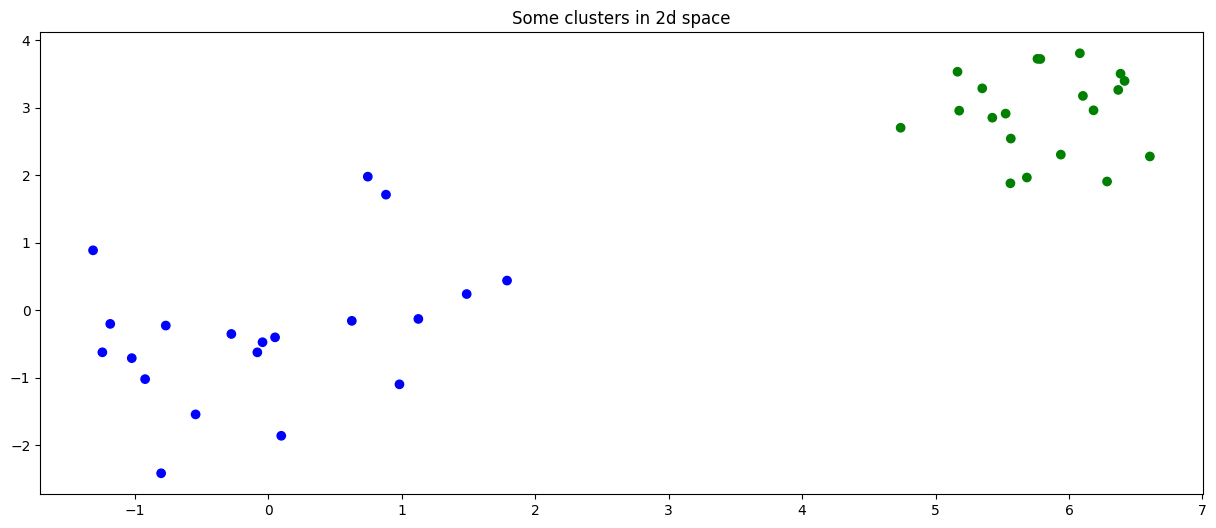

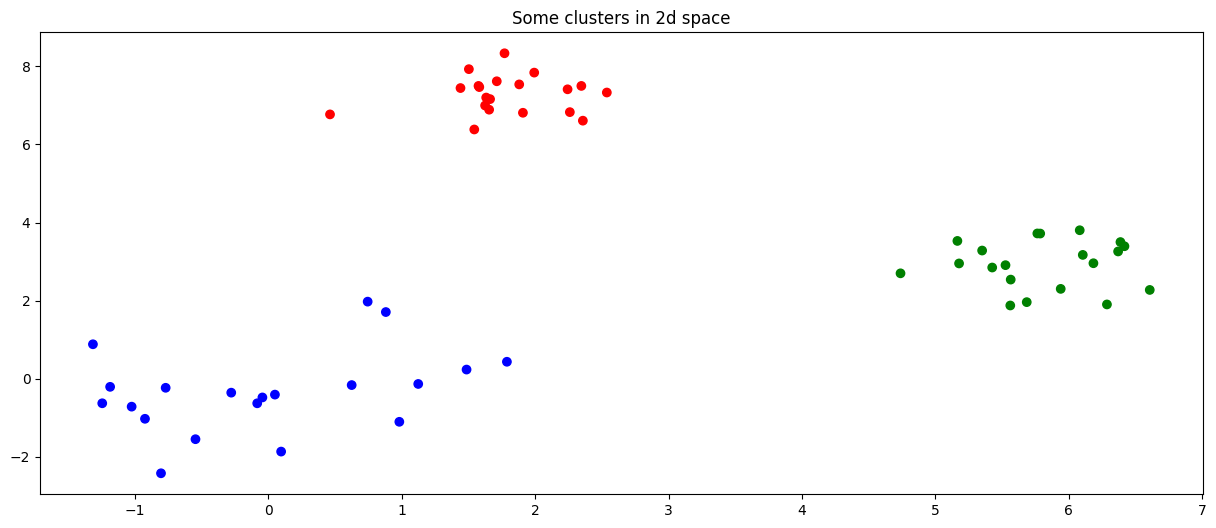

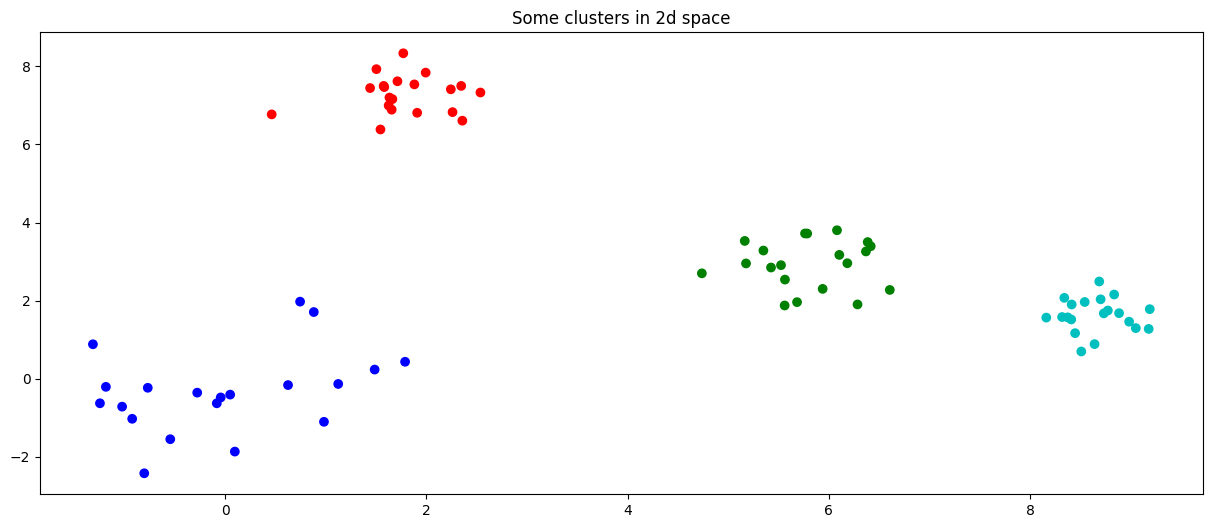

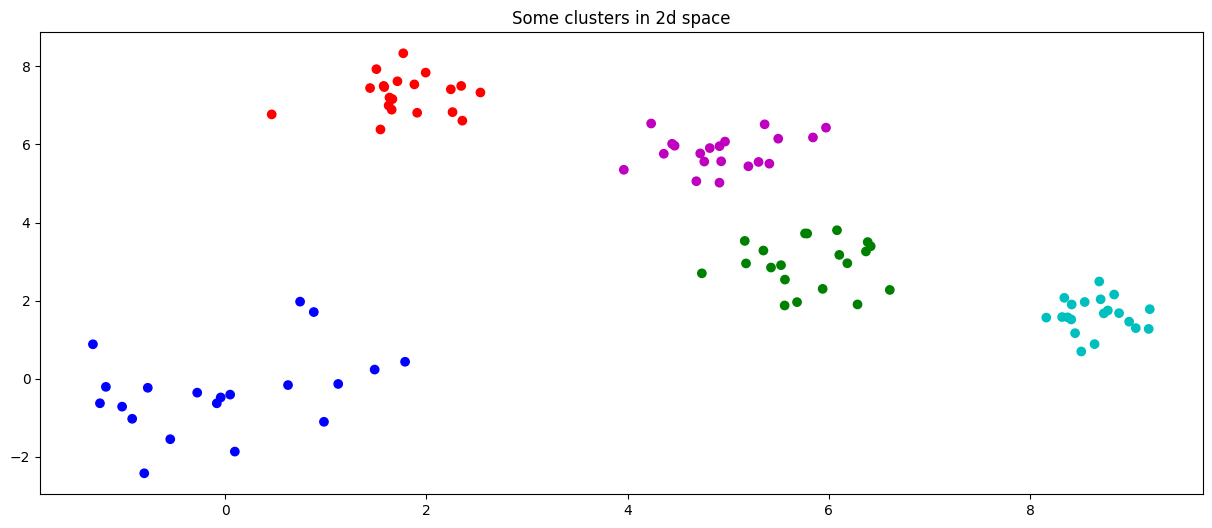

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

n = 20
size = (n, 2)
np.random.seed(3)
x = np.random.normal(0, 1, size)

for i in range(4):
    center = np.random.rand(2) * 10
    x = np.append(x, np.random.normal(center, .5, size), axis=0)
        
    c = [c for s in [v * n for v in 'bgrcmyk'] for c in list(s)]

    plt.figure(figsize=(15, 6))
    plt.title('Some clusters in 2d space')
    plt.scatter(x[:, 0], x[:, 1], c=c[:len(x)])
    # plt.scatter(x[:, 0], x[:, 1])
    plt.show()

In [2]:
def similarity(xi, xj):
    return -((xi - xj)**2).sum()

def create_matrices():
    S = np.zeros((x.shape[0], x.shape[0]))
    R = np.array(S)
    A = np.array(S)
    
    # compute similarity for every data point.
    for i in range(x.shape[0]):
        for k in range(x.shape[0]):
            S[i, k] = similarity(x[i], x[k])
            
    return A, R, S

In [3]:
# Responsibility
## nested implementation

def update_r(damping=0.9):
    global R
    for i in range(x.shape[0]):
        for k in range(x.shape[0]):
            v = S[i, :] + A[i, :] # max function : v = a(i, k) + s(i, k)
            v[k] = -np.inf
            v[i]= -np.inf
            R[i, k] = R[i, k] * damping + (1 - damping) * (S[i, k] - np.max(v))

In [4]:
A, R, S = create_matrices()

In [5]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
S

array([[-0.00000000e+00, -8.15331909e+00, -4.89453127e+00, ...,
        -3.91159456e+01, -4.19029328e+01, -4.97343317e+01],
       [-8.15331909e+00, -0.00000000e+00, -2.41606794e+00, ...,
        -8.26902197e+01, -8.67543670e+01, -9.79487208e+01],
       [-4.89453127e+00, -2.41606794e+00, -0.00000000e+00, ...,
        -6.51838798e+01, -6.88597977e+01, -7.90168407e+01],
       ...,
       [-3.91159456e+01, -8.26902197e+01, -6.51838798e+01, ...,
        -0.00000000e+00, -5.05679093e-02, -6.66449324e-01],
       [-4.19029328e+01, -8.67543670e+01, -6.88597977e+01, ...,
        -5.05679093e-02, -0.00000000e+00, -3.49871660e-01],
       [-4.97343317e+01, -9.79487208e+01, -7.90168407e+01, ...,
        -6.66449324e-01, -3.49871660e-01, -0.00000000e+00]])

In [8]:
%time update_r()

Wall time: 63.1 ms


In [9]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
R

array([[ 1.31411698e-02, -8.02190739e-01, -4.76311957e-01, ...,
        -3.89845339e+00, -4.17715211e+00, -4.96029200e+00],
       [-7.64083939e-01,  5.12479698e-02, -1.90358825e-01, ...,
        -8.21777400e+00, -8.62418873e+00, -9.74362411e+00],
       [-4.82498009e-01, -2.34651677e-01,  6.95511798e-03, ...,
        -6.51143286e+00, -6.87902465e+00, -7.89472895e+00],
       ...,
       [-3.91041997e+00, -8.26784738e+00, -6.51721339e+00, ...,
         1.17458801e-03, -3.88220291e-03, -6.54703444e-02],
       [-4.18861065e+00, -8.67375407e+00, -6.88429714e+00, ...,
        -3.37416612e-03,  1.68262480e-03, -3.33045412e-02],
       [-4.95812364e+00, -9.77956255e+00, -7.88637454e+00, ...,
        -5.13354012e-02, -1.96776347e-02,  1.53095312e-02]])

In [11]:
S

array([[-0.00000000e+00, -8.15331909e+00, -4.89453127e+00, ...,
        -3.91159456e+01, -4.19029328e+01, -4.97343317e+01],
       [-8.15331909e+00, -0.00000000e+00, -2.41606794e+00, ...,
        -8.26902197e+01, -8.67543670e+01, -9.79487208e+01],
       [-4.89453127e+00, -2.41606794e+00, -0.00000000e+00, ...,
        -6.51838798e+01, -6.88597977e+01, -7.90168407e+01],
       ...,
       [-3.91159456e+01, -8.26902197e+01, -6.51838798e+01, ...,
        -0.00000000e+00, -5.05679093e-02, -6.66449324e-01],
       [-4.19029328e+01, -8.67543670e+01, -6.88597977e+01, ...,
        -5.05679093e-02, -0.00000000e+00, -3.49871660e-01],
       [-4.97343317e+01, -9.79487208e+01, -7.90168407e+01, ...,
        -6.66449324e-01, -3.49871660e-01, -0.00000000e+00]])

In [12]:
# Responsibility
## vectorized  implementation

def update_r(damping=0.9):
    global R

    v = S + A
    rows = np.arange(x.shape[0])
    # We only compare the current point to all other points, 
    # so the diagonal can be filled with -infinity
    np.fill_diagonal(v, -np.inf)

    # max values
    idx_max = np.argmax(v, axis=1)
    first_max = v[rows, idx_max]

    # Second max values. For every column where k is the max value.
    v[rows, idx_max] = -np.inf
    second_max = v[rows, np.argmax(v, axis=1)]

    # Broadcast the maximum value per row over all the columns per row.
    max_matrix = np.zeros_like(R) + first_max[:, None]
    max_matrix[rows, idx_max] = second_max

    new_val = S - max_matrix

    R = R * damping + (1 - damping) * new_val

In [13]:
A, R, S = create_matrices()
%time update_r()

Wall time: 998 µs
